<a href="https://colab.research.google.com/github/dele22922/tarea3_feat_eng/blob/main/bags.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

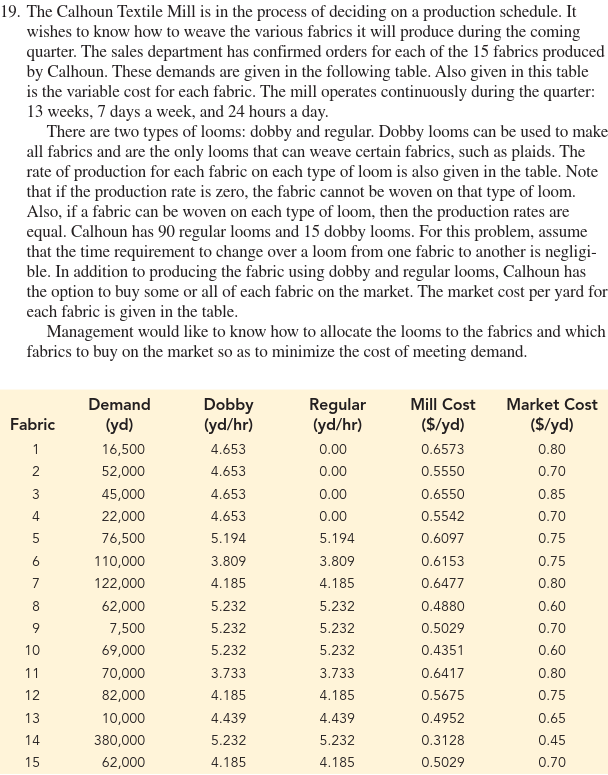

In [ ]:
!pip install pulp
from pulp import *
import numpy as np
import pandas as pd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 84.2 MB/s eta 0:00:00


In [ ]:
datos = pd.read_csv("telares.csv", header=None)
datos.head()

,0,1,2,3,4,5
0,1,16500,4.653,0.000,0.6573,0.80
1,2,52000,4.653,0.000,0.5550,0.70
2,3,45000,4.653,0.000,0.6550,0.85
3,4,22000,4.653,0.000,0.5542,0.70
4,5,76500,5.194,5.194,0.6097,0.75


In [ ]:
datos[1]

0      16500
1      52000
2      45000
3      22000
4      76500
5     110000
6     122000
7      62000
8       7500
9      69000
10     70000
11     82000
12     10000
13    380000
14     62000
Name: 1, dtype: int64

In [ ]:
len(datos)

15

In [ ]:
demanda = datos[1]
ratedobby = datos[2]
rateregular = datos[3]
costoprod = datos[4]
marketcost = datos[5]

In [ ]:
telares = LpProblem("telares", LpMinimize)

In [ ]:
numvar = len(demanda)
horasDobby = LpVariable.matrix("HorasDobby", range(numvar),lowBound=0, cat="Continuous")
horasRegular = LpVariable.matrix("HorasRegular", range(numvar),lowBound=0, cat="Continuous")
yardasCompra = LpVariable.matrix("YardasCompra", range(numvar), lowBound=0, cat="Continuous")

In [ ]:

CostoDobby = lpSum([ratedobby[i]*horasDobby[i]*costoprod[i] for i in range(numvar)])
CostoRegular = lpSum([rateregular[i]*horasRegular[i]*costoprod[i] for i in range(numvar)])
CostoCompra = lpSum([yardasCompra[i]*marketcost[i] for i in range(numvar)])
telares += CostoDobby + CostoRegular + CostoCompra

In [ ]:
CostoDobby

3.0584168999999997*HorasDobby_0 + 2.582415*HorasDobby_1 + 2.3954661*HorasDobby_10 + 2.3749874999999996*HorasDobby_11 + 2.1981927999999997*HorasDobby_12 + 1.6365696000000003*HorasDobby_13 + 2.1046365*HorasDobby_14 + 3.0477149999999997*HorasDobby_2 + 2.5786925999999997*HorasDobby_3 + 3.1667818*HorasDobby_4 + 2.3436776999999998*HorasDobby_5 + 2.7106244999999998*HorasDobby_6 + 2.553216*HorasDobby_7 + 2.6311728000000003*HorasDobby_8 + 2.2764432*HorasDobby_9 + 0.0

In [ ]:
CostoRegular

2.3954661*HorasRegular_10 + 2.3749874999999996*HorasRegular_11 + 2.1981927999999997*HorasRegular_12 + 1.6365696000000003*HorasRegular_13 + 2.1046365*HorasRegular_14 + 3.1667818*HorasRegular_4 + 2.3436776999999998*HorasRegular_5 + 2.7106244999999998*HorasRegular_6 + 2.553216*HorasRegular_7 + 2.6311728000000003*HorasRegular_8 + 2.2764432*HorasRegular_9 + 0.0

In [ ]:
CostoCompra

0.8*YardasCompra_0 + 0.7*YardasCompra_1 + 0.8*YardasCompra_10 + 0.75*YardasCompra_11 + 0.65*YardasCompra_12 + 0.45*YardasCompra_13 + 0.7*YardasCompra_14 + 0.85*YardasCompra_2 + 0.7*YardasCompra_3 + 0.75*YardasCompra_4 + 0.75*YardasCompra_5 + 0.8*YardasCompra_6 + 0.6*YardasCompra_7 + 0.7*YardasCompra_8 + 0.6*YardasCompra_9 + 0.0

In [ ]:
telares

telares:
MINIMIZE
3.0584168999999997*HorasDobby_0 + 2.582415*HorasDobby_1 + 2.3954661*HorasDobby_10 + 2.3749874999999996*HorasDobby_11 + 2.1981927999999997*HorasDobby_12 + 1.6365696000000003*HorasDobby_13 + 2.1046365*HorasDobby_14 + 3.0477149999999997*HorasDobby_2 + 2.5786925999999997*HorasDobby_3 + 3.1667818*HorasDobby_4 + 2.3436776999999998*HorasDobby_5 + 2.7106244999999998*HorasDobby_6 + 2.553216*HorasDobby_7 + 2.6311728000000003*HorasDobby_8 + 2.2764432*HorasDobby_9 + 2.3954661*HorasRegular_10 + 2.3749874999999996*HorasRegular_11 + 2.1981927999999997*HorasRegular_12 + 1.6365696000000003*HorasRegular_13 + 2.1046365*HorasRegular_14 + 3.1667818*HorasRegular_4 + 2.3436776999999998*HorasRegular_5 + 2.7106244999999998*HorasRegular_6 + 2.553216*HorasRegular_7 + 2.6311728000000003*HorasRegular_8 + 2.2764432*HorasRegular_9 + 0.8*YardasCompra_0 + 0.7*YardasCompra_1 + 0.8*YardasCompra_10 + 0.75*YardasCompra_11 + 0.65*YardasCompra_12 + 0.45*YardasCompra_13 + 0.7*YardasCompra_14 + 0.85*YardasCo

In [ ]:
horasdispDobby = 7*13*24*15
horasdispRegular = 7*13*24*90

In [ ]:
for i in range(len(demanda)):
     telares += horasDobby[i]*ratedobby[i] + horasRegular[i]*rateregular[i] + yardasCompra[i] >= demanda[i]


In [ ]:
telares += lpSum([horasDobby[i] for i in range(len(demanda))]) <= horasdispDobby
telares += lpSum([horasRegular[i] for i in range(len(demanda))]) <= horasdispRegular

In [ ]:
telares

telares:
MINIMIZE
3.0584168999999997*HorasDobby_0 + 2.582415*HorasDobby_1 + 2.3954661*HorasDobby_10 + 2.3749874999999996*HorasDobby_11 + 2.1981927999999997*HorasDobby_12 + 1.6365696000000003*HorasDobby_13 + 2.1046365*HorasDobby_14 + 3.0477149999999997*HorasDobby_2 + 2.5786925999999997*HorasDobby_3 + 3.1667818*HorasDobby_4 + 2.3436776999999998*HorasDobby_5 + 2.7106244999999998*HorasDobby_6 + 2.553216*HorasDobby_7 + 2.6311728000000003*HorasDobby_8 + 2.2764432*HorasDobby_9 + 2.3954661*HorasRegular_10 + 2.3749874999999996*HorasRegular_11 + 2.1981927999999997*HorasRegular_12 + 1.6365696000000003*HorasRegular_13 + 2.1046365*HorasRegular_14 + 3.1667818*HorasRegular_4 + 2.3436776999999998*HorasRegular_5 + 2.7106244999999998*HorasRegular_6 + 2.553216*HorasRegular_7 + 2.6311728000000003*HorasRegular_8 + 2.2764432*HorasRegular_9 + 0.8*YardasCompra_0 + 0.7*YardasCompra_1 + 0.8*YardasCompra_10 + 0.75*YardasCompra_11 + 0.65*YardasCompra_12 + 0.45*YardasCompra_13 + 0.7*YardasCompra_14 + 0.85*YardasCo

In [ ]:
telares.solve()

1

In [ ]:
telares.objective.value()

599108.1556556015

In [ ]:
for i in telares.variables():
  print(i.name, i.varValue)

HorasDobby_0 3546.0993
HorasDobby_1 11175.586
HorasDobby_10 0.0
HorasDobby_11 0.0
HorasDobby_12 2205.5166
HorasDobby_13 0.0
HorasDobby_14 0.0
HorasDobby_2 9671.1799
HorasDobby_3 4728.1324
HorasDobby_4 0.0
HorasDobby_5 0.0
HorasDobby_6 0.0
HorasDobby_7 0.0
HorasDobby_8 1433.4862
HorasDobby_9 0.0
HorasRegular_0 0.0
HorasRegular_1 0.0
HorasRegular_10 18751.674
HorasRegular_11 19593.787
HorasRegular_12 47.243075
HorasRegular_13 72629.969
HorasRegular_14 14814.815
HorasRegular_2 0.0
HorasRegular_3 0.0
HorasRegular_4 14728.533
HorasRegular_5 1804.0195
HorasRegular_6 29151.732
HorasRegular_7 11850.153
HorasRegular_8 0.0
HorasRegular_9 13188.073
YardasCompra_0 0.0
YardasCompra_1 0.0
YardasCompra_10 0.0
YardasCompra_11 0.0
YardasCompra_12 0.0
YardasCompra_13 0.0
YardasCompra_14 0.0
YardasCompra_2 0.0
YardasCompra_3 0.0
YardasCompra_4 0.0
YardasCompra_5 103128.49
YardasCompra_6 0.0
YardasCompra_7 0.0
YardasCompra_8 0.0
YardasCompra_9 0.0
